# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Datasets

In [2]:
bd_train = pd.read_csv('counterfeit_train.csv')
bd_test = pd.read_csv('counterfeit_test.csv')

# Data Exploration

In [3]:
bd_train.head(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
5,JDG81,8.775,Area045,2000,165.5656,Antiseptics,mild,0.088881,DownTown,Tier 2,Unknown,3047.8464
6,KPX48,18.000,Area018,2007,156.9102,Hreplacements,critical,0.051685,Industrial,Tier 3,Medium,2883.3938
7,CYW14,7.680,Area013,1985,154.3470,Antiseptics,mild,0.028150,DownTown,Tier 3,High,3262.2340
8,TVF57,18.550,Area046,1995,107.3068,Hreplacements,critical,0.060266,DownTown,Tier 1,Small,1959.9292
9,MGU75,9.510,Area013,1985,161.1392,Statins,mild,0.023755,DownTown,Tier 3,High,3095.7840


In [4]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [5]:
bd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          1705 non-null   object 
 1   Counterfeit_Weight   1408 non-null   float64
 2   DistArea_ID          1705 non-null   object 
 3   Active_Since         1705 non-null   int64  
 4   Medicine_MRP         1705 non-null   float64
 5   Medicine_Type        1705 non-null   object 
 6   SidEffect_Level      1705 non-null   object 
 7   Availability_rating  1705 non-null   float64
 8   Area_Type            1705 non-null   object 
 9   Area_City_Type       1705 non-null   object 
 10  Area_dist_level      1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.7+ KB


# Feature Selection and Preprocessing

In [6]:
X = bd_train.drop(columns=['Counterfeit_Sales', 'Medicine_ID'])  # Exclude Medicine_ID
y = bd_train['Counterfeit_Sales']

In [7]:
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    X[col].fillna(X[col].median(), inplace=True)

# Label Encoding for Categorical Variables

In [8]:
label_encoders = {}

In [9]:
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [10]:
for col in bd_test.select_dtypes(include=['float64', 'int64']).columns:
    bd_test[col].fillna(bd_test[col].median(), inplace=True)

In [11]:
for col in bd_test.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        bd_test[col] = label_encoders[col].transform(bd_test[col])

# Data Splitting

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [13]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    
    # Predict on validation data
    y_val_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"{model_name} Validation RMSE: {rmse}")
    
    # Predict on test data
    test_features = bd_test.drop(columns=['Medicine_ID'])
    test_predictions = model.predict(test_features)
    
    return test_predictions

# Feature Scaling

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_val_scaled = scaler.transform(X_val)

In [17]:
bd_test_scaled = scaler.transform(bd_test.drop(columns=['Medicine_ID']))

# Applying Linear Regression Algorithm

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
lr_val_pred = lr_model.predict(X_val_scaled)

In [21]:
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_val_pred))

In [22]:
lr_rmse

1134.9547614718535

In [23]:
lr_test_predictions = lr_model.predict(bd_test_scaled)

# Applying Decision Trees Algorithm

In [24]:
dt_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
dt_model = DecisionTreeRegressor(random_state=42)

In [26]:
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

In [27]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [28]:
dt_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [29]:
best_dt_model = dt_grid_search.best_estimator_

In [30]:
dt_val_pred = best_dt_model.predict(X_val)

In [31]:
dt_rmse = np.sqrt(mean_squared_error(y_val, dt_val_pred))

In [32]:
dt_rmse

1077.6061127674707

In [33]:
dt_test_predictions = best_dt_model.predict(bd_test.drop(columns=['Medicine_ID']))

# Applying Random Forest Algorithm

In [34]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [35]:
rf_model = RandomForestRegressor(random_state=42)

In [36]:
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

In [37]:
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [38]:
best_rf_model = rf_grid_search.best_estimator_

In [39]:
rf_val_pred = best_rf_model.predict(X_val)

In [40]:
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_val_pred))

In [41]:
rf_rmse

1077.7975882980074

In [42]:
rf_test_predictions = best_rf_model.predict(bd_test.drop(columns=['Medicine_ID']))

# Compare models

In [43]:
print("\nComparison of Models:")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")


Comparison of Models:
Linear Regression RMSE: 1134.9547614718535
Decision Tree RMSE: 1077.6061127674707
Random Forest RMSE: 1077.7975882980074


In [44]:
# Identify the best model
rmse_dict = {
    "Linear Regression": lr_rmse,
    "Decision Tree": dt_rmse,
    "Random Forest": rf_rmse
}

In [45]:
best_model_name = min(rmse_dict, key=rmse_dict.get)

In [46]:
print(f"\nBest Model: {best_model_name} with RMSE = {rmse_dict[best_model_name]}")


Best Model: Decision Tree with RMSE = 1077.6061127674707


In [47]:
# Test predictions of the best model
if best_model_name == "Linear Regression":
    final_test_predictions = lr_test_predictions
elif best_model_name == "Decision Tree":
    final_test_predictions = dt_test_predictions
elif best_model_name == "Random Forest":
    final_test_predictions = rf_test_predictions

In [48]:
# Output final test predictions
print(f"\nTest Predictions from {best_model_name}:")
print(final_test_predictions)


Test Predictions from Decision Tree:
[1842.31260364 4033.73851053 1578.58188821 ... 3145.984963   3478.6076188
 4033.73851053]


# Submission

In [ ]:
# Linear Regression Submission
lr_submission = pd.DataFrame({'Counterfeit_Sales': lr_test_predictions})
lr_submission.to_csv('submission_linear_regression.csv', index=False)

In [ ]:
# Decision Tree Regressor Submission
dt_submission = pd.DataFrame({'Counterfeit_Sales': dt_test_predictions})
dt_submission.to_csv('submission_decision_tree.csv', index=False)

In [ ]:
# Random Forest Regressor Submission
rf_submission = pd.DataFrame({'Counterfeit_Sales': rf_test_predictions})
rf_submission.to_csv('submission_random_forest.csv', index=False)

# Distribution of Target Variable (Counterfeit Sales)

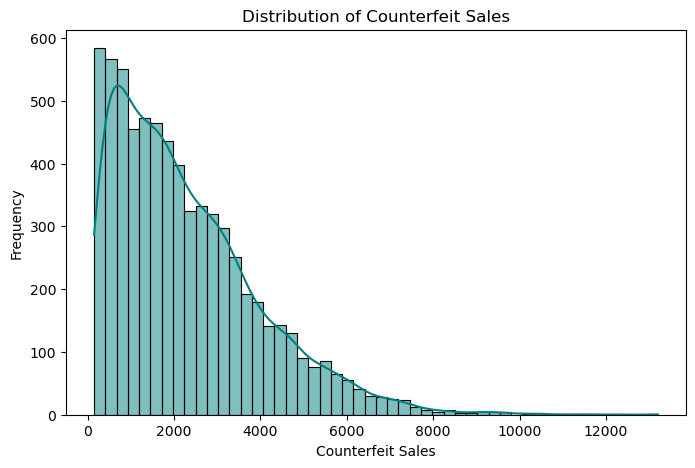

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=50, kde=True, color='teal')
plt.title('Distribution of Counterfeit Sales')
plt.xlabel('Counterfeit Sales')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap (for Numeric Features)

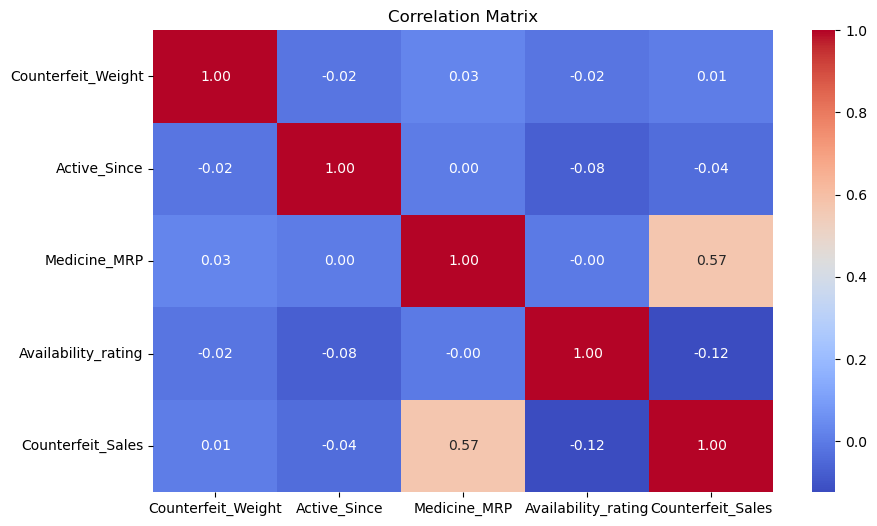

In [50]:
plt.figure(figsize=(10, 6))
corr_matrix = bd_train.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Box Plot: Sales vs. Side Effect Level

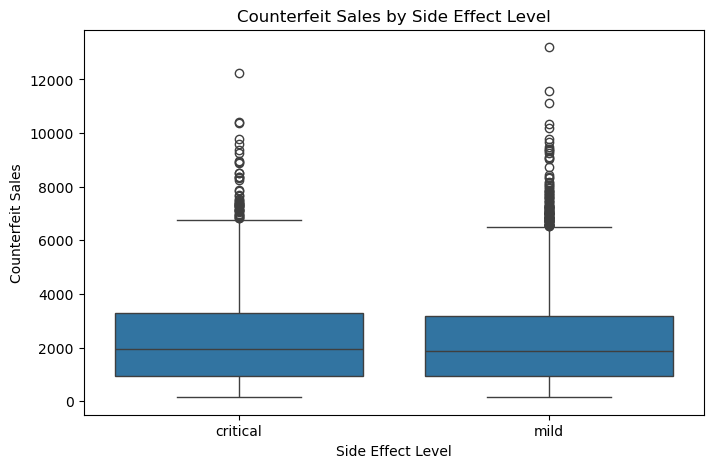

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='SidEffect_Level', y='Counterfeit_Sales', data=bd_train)
plt.title('Counterfeit Sales by Side Effect Level')
plt.xlabel('Side Effect Level')
plt.ylabel('Counterfeit Sales')
plt.show()

# Violin Plot: Sales vs. Area City Type

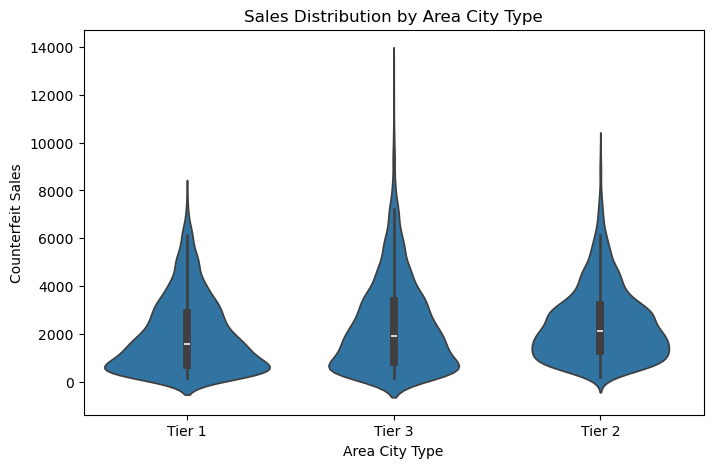

In [52]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Area_City_Type', y='Counterfeit_Sales', data=bd_train)
plt.title('Sales Distribution by Area City Type')
plt.xlabel('Area City Type')
plt.ylabel('Counterfeit Sales')
plt.show()

# Scatter Plot: MRP vs. Counterfeit Sales

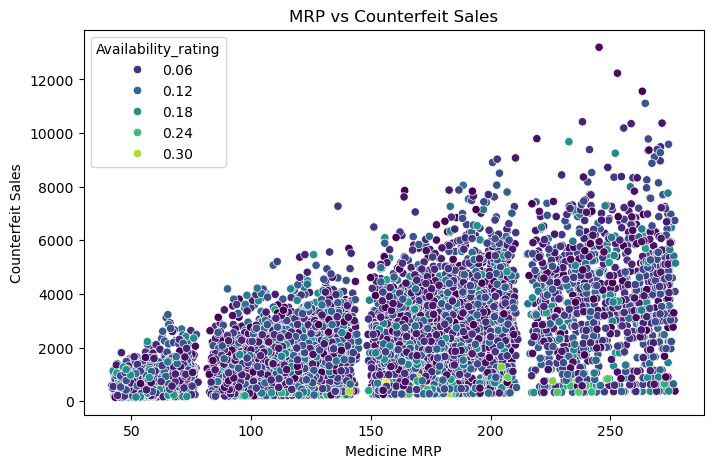

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Medicine_MRP', y='Counterfeit_Sales', data=bd_train, hue='Availability_rating', palette='viridis')
plt.title('MRP vs Counterfeit Sales')
plt.xlabel('Medicine MRP')
plt.ylabel('Counterfeit Sales')
plt.show()

# Count Plot of Categorical Features

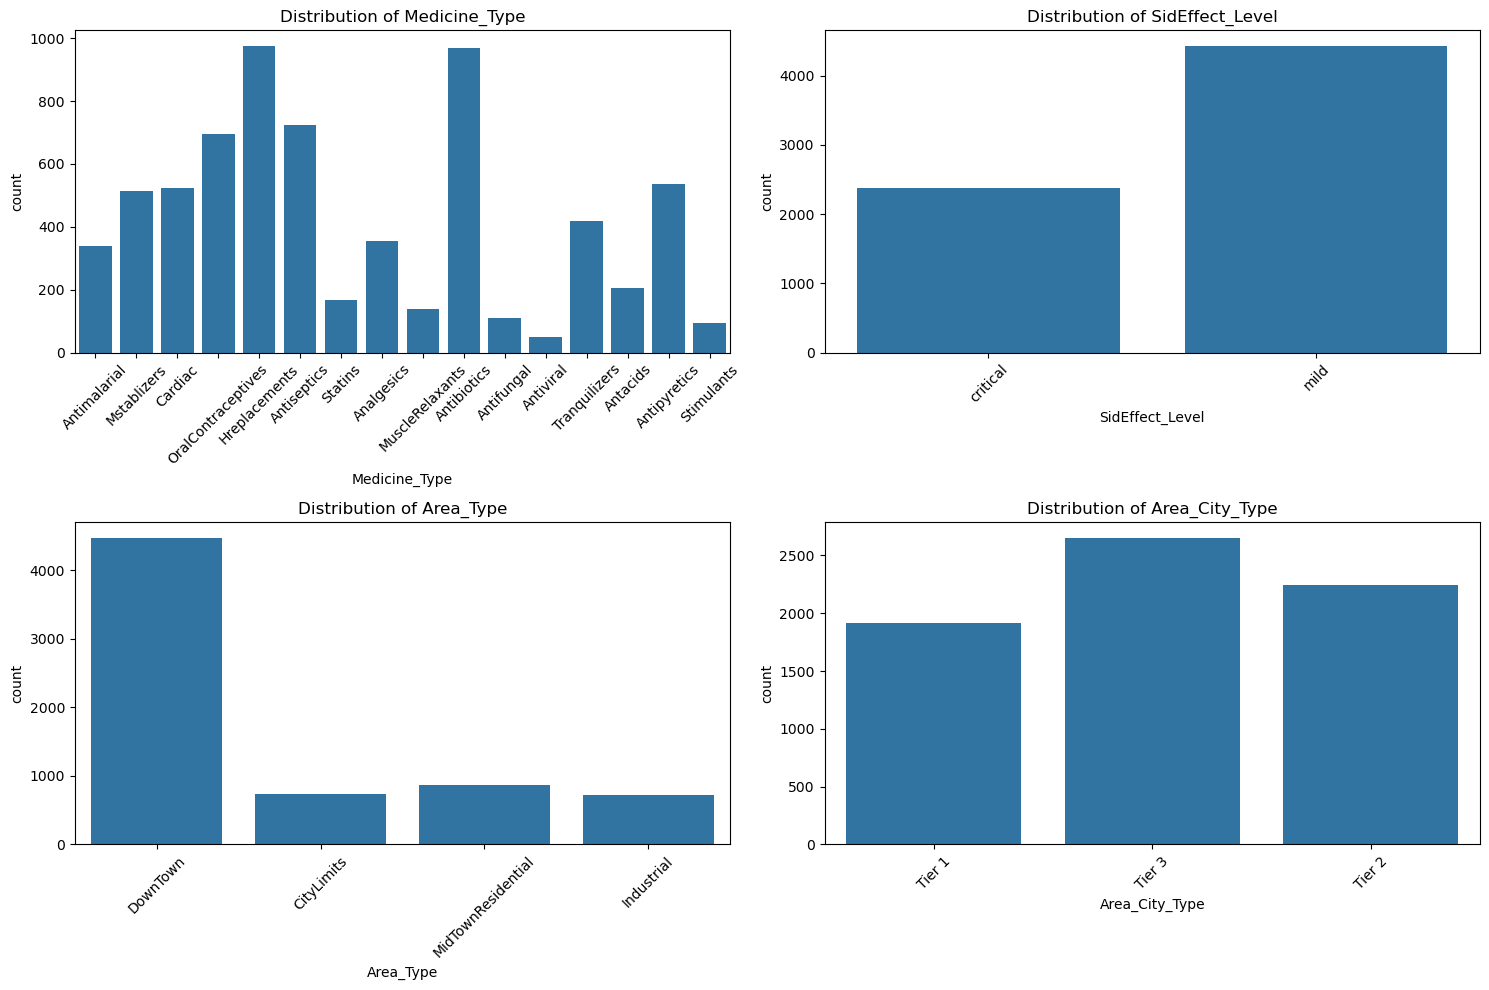

In [54]:
cat_features = ['Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=bd_train)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()